<a href="https://colab.research.google.com/github/RatatouilleIzCooking/Testing/blob/main/KAL_PIMA_DiabetesML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aimee Icaza:
I contributed to this project by creating the Isomap 2-component plot, performing Isomap dimensionality reduction, and generating the K-means plot. Additionally, I wrote the base code for the confusion matrix, although I received support from Ketsia in correctly flipping the values, as I encountered difficulties in placing them correctly to achieve the 72% accuracy score. I also played a key role in organizing the project by setting up a Google folder containing all necessary materials, including the slides, code, and other resources required for this assignment.

In addition to the previous contributions, I also created a 3D scatterplot for the principal components plot, which provided an enhanced visualization of the data in three dimensions. This helped to better understand the distribution of data points across the principal components. Moreover, I generated ROC plots for various models, including Logistic Regression, PCA, IsoMap, GNB, and Perceptron. To present a comprehensive comparison, I combined these five models into a single ROC plot, which displayed all their respective ROC curves on the same graph for easy visualization of model performance.

Ketsia Pierrelus:
I worked on the Gaussian Naive Bayes confusion matrix section and helped Aimee with the Isomap dimensionality reduction and K-means plot. We ran into a problem with the confusion matrix because the values were in the right section, but the labels were incorrect. To fix this, I went back and reviewed the previous scripts and realized that we had labeled "healthy" and "sick" incorrectly. Once I corrected the labels we were able to resolve the issue. Additionally, I worked on the PCA Variance Ratio Plot. By following the example from the data science textbook and adjusting the code for our dataset, I generated a graph that shows how much variance each principal component captures, helping to determine the number of components needed to effectively represent the data.

Li lan Fang:
I contributed to this project by adding the PNG export functionality to the entire code assignment, enabling users to view the graphs more clearly without distractions from the terminal. Additionally, I worked on the PCA project plot, the PCA K-means clustering, and the confusion matrix prediction after applying PCA and K-means clustering. Although I initially had difficulty flipping the values in the confusion matrix, I was able to resolve the issue effectively using online resources.

# 0. Import and process data


In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_diabetes, make_blobs
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Colab utilities
from google.colab import files


# Set seaborn style
sns.set_style('whitegrid')



# Load the data from the CSV file
df = pd.read_csv('Diabetes_Pima.csv')
#Diabetes. Patient ID exclueded
df = df.drop(['Patient ID'], axis=1)
df.head()
df.dropna(axis=0, how='any', inplace=True)

In [2]:
#Diabetes. Patient ID exclueded
X_diabetes = df.drop(['Diabetes'], axis=1)

df = df.dropna()
X_diabetes = X_diabetes.dropna()
print (X_diabetes.shape)
y_diabetes = df['Diabetes']
y_diabetes.shape
print (y_diabetes.shape)

(392, 8)
(392,)


# 1.PCA -> K-means -> PC plot -> confusion matrix



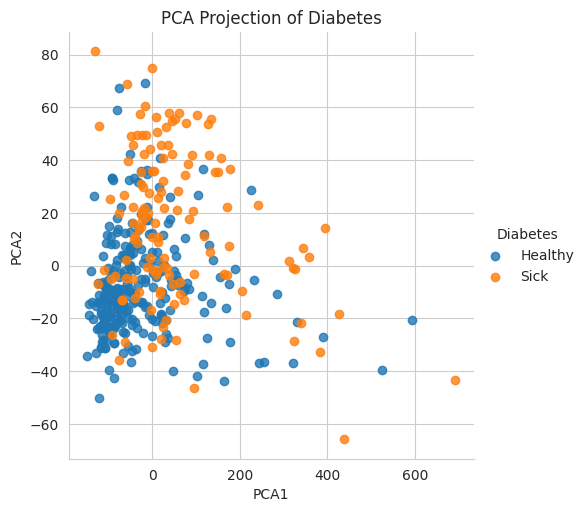

In [3]:

model = PCA(n_components=2)            # 2. Instantiate the model
model.fit(X_diabetes)                  # 3. Fit to data
X = model.transform(X_diabetes)         # 4. Transform the data

df['PCA1'] = X[:, 0]
df['PCA2'] = X[:, 1]
sns.lmplot(x="PCA1", y="PCA2", hue='Diabetes', data=df, fit_reg=False);
plt.title('PCA Projection of Diabetes')
plt.savefig("PCA_Diabetes.png")

plt.show()

<ipython-input-4-c0d774d292f7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a1['Diabetes'] = df_a1['Diabetes'].map({'Healthy': 0, 'Sick': 1})
<ipython-input-4-c0d774d292f7>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a1['Cluster_Label'] = df_a1['Diabetes'].map(cluster_labels)


K-Means Clustering Accuracy PCA: 0.74


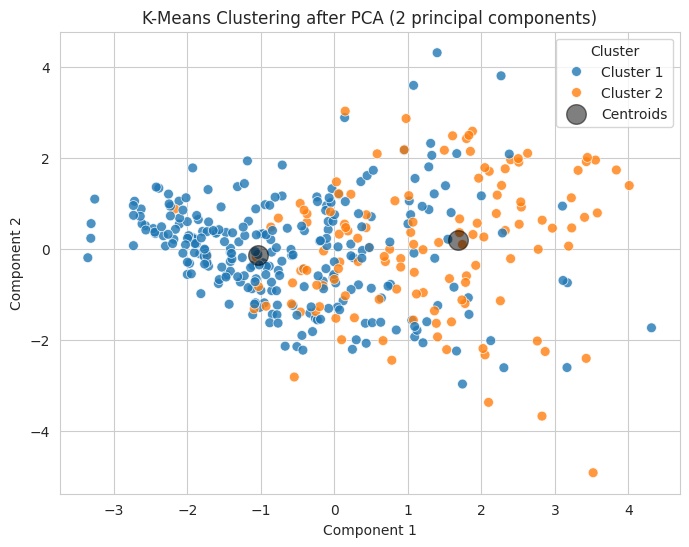

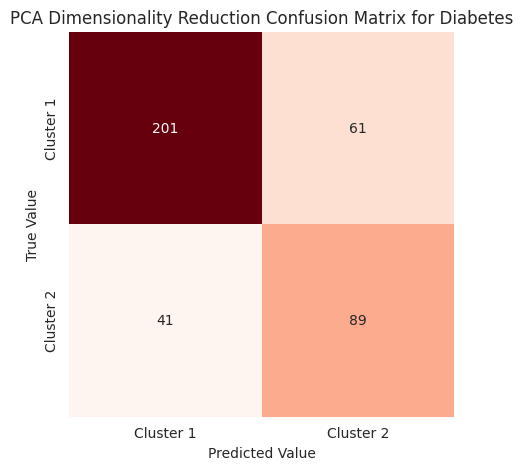

In [4]:

# KMeans on Diabetes Pima
def pca():
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set_style('whitegrid')

  # Load the diabetes dataset
  df = pd.read_csv("Diabetes_Pima.csv")
  df_a1 = df.dropna()

  # Diabetes into binary (Healthy = 0, Sick = 1)
  df_a1['Diabetes'] = df_a1['Diabetes'].map({'Healthy': 0, 'Sick': 1})
  y_diaBinary = df_a1['Diabetes']
  #y_target = df_a1['Diabetes']

  # Cleaning (Diabetes and Patient ID)
  X_col2 = df_a1.drop(columns=['Diabetes', 'Patient ID'])

  # Standard
  scaler = StandardScaler()
  X_col2_scale = scaler.fit_transform(X_col2)

  # PCA
  pca = PCA(n_components=2)
  X_col2PCA = pca.fit_transform(X_col2_scale)
  df_2PCA = pd.DataFrame(X_col2PCA, columns=['Component 1', 'Component 2'])
  # PANADA MAP
  #df_2PCA['Cluster'] = pd.Series(kmeans_labels).map({0: 'Healthy', 1: 'Sick'})

  # K-Means Clustering (Healthy and Sick)
  kmeans = KMeans(n_clusters=2, random_state=1, n_init=10)
  kmeans.fit(X_col2_scale)
  kmeans_labels = kmeans.predict(X_col2_scale)

  # See ac. compare w/ actual labels
  accuracy = max(accuracy_score(y_diaBinary, kmeans_labels),
                accuracy_score(y_diaBinary, 1 - kmeans_labels))
  print(f'K-Means Clustering Accuracy PCA: {accuracy:.2f}')

  # Cluster w/ K-Means centers
  plt.figure(figsize=(8, 6))
  # Map the clusters to the desired labels
  cluster_labels = {0: "Cluster 1", 1: "Cluster 2"}
  df_a1['Cluster_Label'] = df_a1['Diabetes'].map(cluster_labels)

  # Plot with updated labels
  sns.scatterplot(x=X_col2PCA[:, 0], y=X_col2PCA[:, 1], hue=df_a1['Cluster_Label'], s=50, alpha=0.8)

  # LABEL cluster centers
  centers_pca = pca.transform(kmeans.cluster_centers_)
  plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=200, alpha=0.5, marker='o', label='Centroids')

  plt.title('K-Means Clustering after PCA (2 principal components)')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.legend(title="Cluster")
  plt.savefig("PCA_Kmean.png")

  plt.show()

  # Generate confusion matrix
  mat = confusion_matrix(y_diaBinary, kmeans_labels)

  # Plot confusion matrix as heatmap
  display_labels = ['Cluster 1', 'Cluster 2']
  plt.figure(figsize=(6, 5))
  sns.heatmap(mat, square=True, annot=True, cmap='Reds', fmt='d', cbar=False,
              xticklabels=display_labels, yticklabels=display_labels)
  plt.xlabel('Predicted Value')
  plt.ylabel('True Value')
  plt.title("PCA Dimensionality Reduction Confusion Matrix for Diabetes")
  # Save and export the confusion matrix plot
  plt.savefig("PCA_confusion_matrix.png")

  plt.show()
  plt.close()

pca()

# 2. Isomap Dimensionality Reduction -> Kmeans clustering

K-Means Clustering Accuracy (Isomap with 2 components): 0.72


<Figure size 600x500 with 0 Axes>

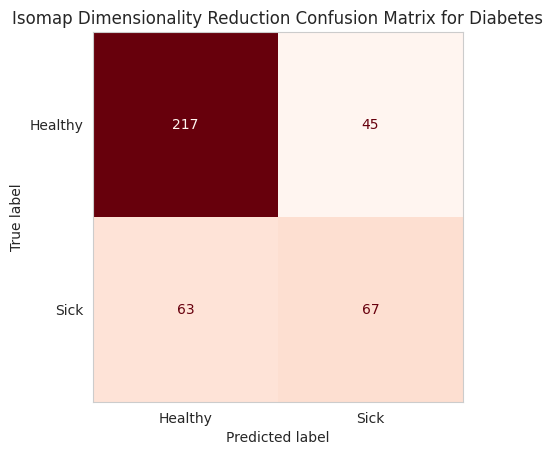

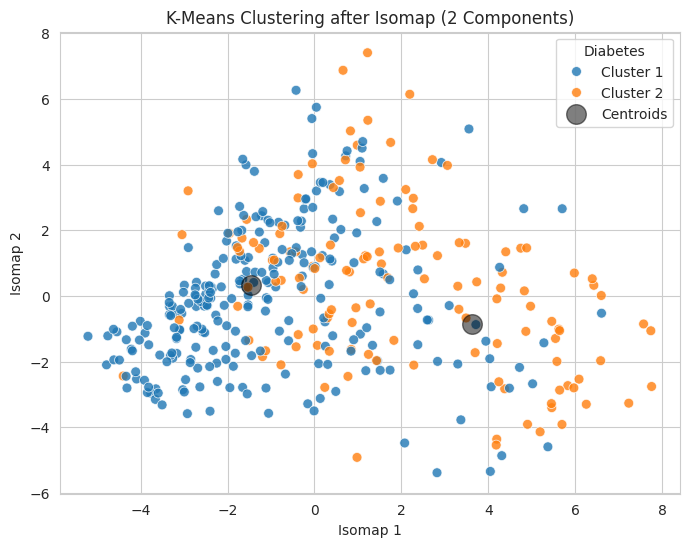

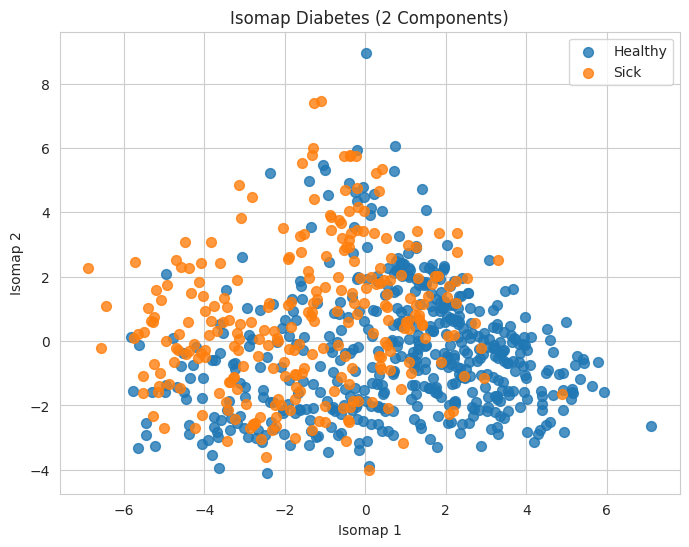

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def isomap():
    # Load the Pima Indians Diabetes dataset
    df = pd.read_csv('Diabetes_Pima.csv')
    df = df.dropna()  # Remove rows with missing values

    # Convert 'Diabetes' column to binary values (Healthy = 0, Sick = 1)
    df['Diabetes'] = df['Diabetes'].map({'Healthy': 0, 'Sick': 1})
    y_diaBinary = df['Diabetes']  # Target variable

    # Drop unnecessary columns (Diabetes and Patient ID)
    X_features = df.drop(columns=['Diabetes', 'Patient ID'])

    # Scale the feature values (Isomap is sensitive to scale)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_features)

    # Apply Isomap for dimensionality reduction to 2 components
    iso = Isomap(n_components=2)
    data_projected = iso.fit_transform(X_scaled)

    # Store the transformed components for visualization
    df['Isomap1'] = data_projected[:, 0]
    df['Isomap2'] = data_projected[:, 1]

    # Apply K-Means clustering with 2 clusters (Healthy and Sick)
    kmeans = KMeans(n_clusters=2, random_state=1, n_init=10)
    kmeans.fit(data_projected)
    kmeans_labels = kmeans.predict(data_projected)

    # Ensure clustering labels match the actual labels (0 = Healthy, 1 = Sick)
    accuracy = max(accuracy_score(y_diaBinary, kmeans_labels),
                   accuracy_score(y_diaBinary, 1 - kmeans_labels))
    print(f'K-Means Clustering Accuracy (Isomap with 2 components): {accuracy:.2f}')

    # Adjust predicted labels if needed
    if accuracy_score(y_diaBinary, kmeans_labels) < accuracy_score(y_diaBinary, 1 - kmeans_labels):
        kmeans_labels = 1 - kmeans_labels  # Flip labels if necessary

    # Compute confusion matrix
    cm = confusion_matrix(y_diaBinary, kmeans_labels)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Sick'])

    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    cm_display.plot(cmap='Reds', values_format='d', xticks_rotation='horizontal', colorbar=False)
    plt.grid(False)
    plt.title("Isomap Dimensionality Reduction Confusion Matrix for Diabetes")
    plt.savefig("Isomap_ConfusionMatrix.png")

    plt.show()

    # Plot Isomap-transformed data with K-Means clustering results
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Isomap1'], y=df['Isomap2'], hue=df['Diabetes'], s=50, alpha=0.8)

    # Plot cluster centroids
    centers_iso = kmeans.cluster_centers_
    plt.scatter(centers_iso[:, 0], centers_iso[:, 1], c='black', s=200, alpha=0.5, marker='o', label='Centroids')

    plt.title('K-Means Clustering after Isomap (2 Components)')
    plt.xlabel('Isomap 1')
    plt.ylabel('Isomap 2')

    # Customize legend to show correct labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=[handles[0], handles[1], handles[2]], labels=['Cluster 1', 'Cluster 2', 'Centroids'], title="Diabetes")
    plt.savefig("Isomap_Kmeans.png")
    plt.show()

    # Additional Isomap Visualization
    iso_data = pd.read_csv('Diabetes_Pima.csv')
    isoX = iso_data.drop('Diabetes', axis=1)
    isoy = iso_data['Diabetes']
    diabetes_mapping = {'Healthy': 0, 'Sick': 1}
    isoy_numeric = isoy.map(diabetes_mapping)
    scaler = StandardScaler()
    isoX_scaled = scaler.fit_transform(isoX)
    imputer = SimpleImputer(strategy='mean')
    isoX_scaled = imputer.fit_transform(isoX_scaled)
    isomap = Isomap(n_components=2)
    isoX_isomap = isomap.fit_transform(isoX_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(isoX_isomap[isoy_numeric == 0, 0], isoX_isomap[isoy_numeric == 0, 1], label="Healthy", s=50, alpha=0.8)
    plt.scatter(isoX_isomap[isoy_numeric == 1, 0], isoX_isomap[isoy_numeric == 1, 1], label="Sick", s=50, alpha=0.8)
    plt.title("Isomap Diabetes (2 Components)")
    plt.xlabel("Isomap 1")
    plt.ylabel("Isomap 2")
    plt.legend()
    plt.savefig("Isomap_2components.png")
    plt.show()

# Run the function
isomap()


# 3. Gaussian Naive Bayes -> Confusion Matrix

Accuracy score= 0.75


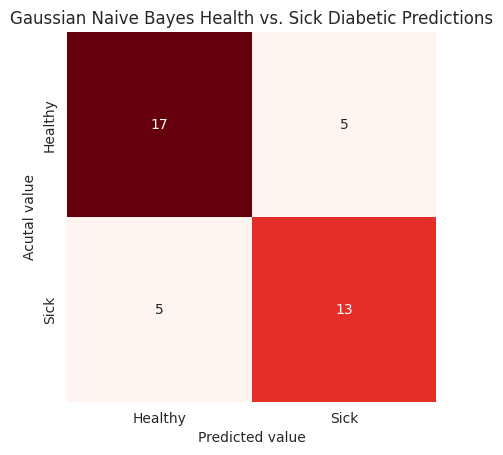

In [6]:
def gnn(X,y):
  Xtrain, Xtest, ytrain, ytest = train_test_split(X_diabetes, y_diabetes,test_size=0.1,
                                                  random_state=1)

  model = GaussianNB()
  model.fit(Xtrain, ytrain)
  y_model = model.predict(Xtest)

  print('Accuracy score= ' + str(accuracy_score(ytest, y_model)))

  #make the 0 in not match and 1 into match label axis
  from sklearn.metrics import confusion_matrix

  mat = confusion_matrix(ytest, y_model)

  display_labels = ['Healthy', 'Sick']
  sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Reds',
              xticklabels=display_labels, yticklabels=display_labels)
  plt.title('Gaussian Naive Bayes Health vs. Sick Diabetic Predictions')
  plt.xlabel('Predicted value')
  plt.ylabel('Acutal value');
  plt.savefig("Gaussian_NB_confusion_matrix.png")
  return plt.gcf()

fig3 = gnn(X_diabetes, y_diabetes)

# Display the plot outside the function
plt.show()

# 4. Results Section
1. PC plots from PCA and IsoMap, side-by-side with Titles
2. Table of accuracty scores - compare the accuracy scores for 1,2,3 predictions.
3. Confusion matrices (2x2 matrices) - 3 plots, one for each step above.
4. The plots should be visually appealing, with consistent style across the plot.
5. The ultimate goal is to have all plots on a single figure (.jpg or .png file)


ROC (receiver operating characteristic) Curve https://www.datacamp.com/tutorial/understanding-logistic-regression-python

Accuracy score= 0.7653061224489796


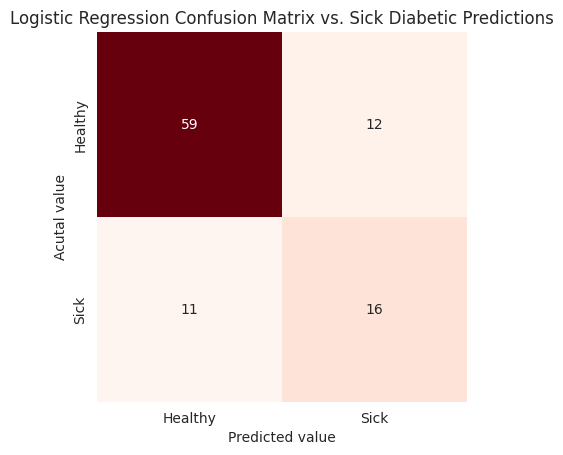

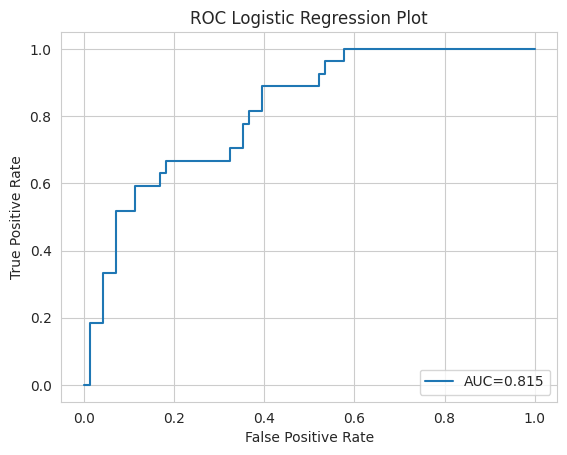

In [7]:
# Function to compute confusion matrix
def ROC_logreg(X_diabetes, y_diabetes):
    # Map labels: Healthy = 0, Sick = 1
    y_diabetes = y_diabetes.map({'Healthy': 0, 'Sick': 1})

    # Split X and y into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.25, random_state=16)

    # Instantiate and fit logistic regression model
    logreg = LogisticRegression(random_state=16, max_iter=500)
    logreg.fit(X_train, y_train)

    # Predict the response
    y_pred = logreg.predict(X_test)
    y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Get probability predictions

    #accuracy score
    print('Accuracy score= ' + str(accuracy_score(y_test, y_pred)))

    # Confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    display_labels = ['Healthy', 'Sick']
    sns.heatmap(cnf_matrix, square=True, annot=True, cbar=False, cmap='Reds',
                xticklabels=display_labels, yticklabels=display_labels)
    plt.title('Logistic Regression Confusion Matrix vs. Sick Diabetic Predictions')
    plt.xlabel('Predicted value')
    plt.ylabel('Acutal value');
    plt.savefig("LogisticRegression_confusionmatrix.png")
    plt.show()


    # Compute ROC curve and AUC score
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label=1)  # Explicitly set positive label as 1
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="AUC=" + str(round(auc, 3)))
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Logistic Regression Plot")
    plt.savefig("LogisticRegression_ROC.png")
    plt.show()


ROC_logreg(X_diabetes, y_diabetes)

PCA Plot
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


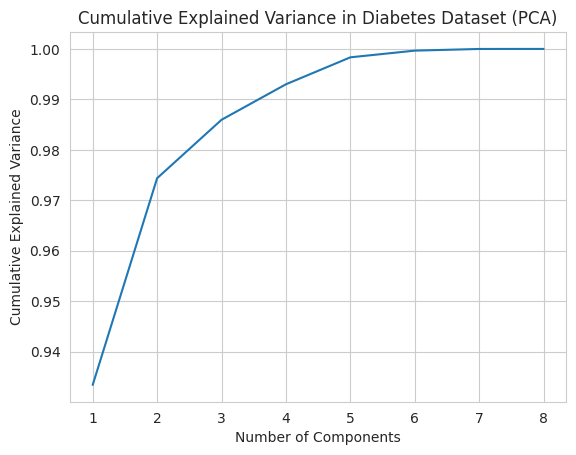

In [8]:
pca = PCA().fit(X_diabetes)
plt.plot(range(1, 9), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance in Diabetes Dataset (PCA)")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig("PCA_CumulativeExplaindVariance.png")
plt.show()

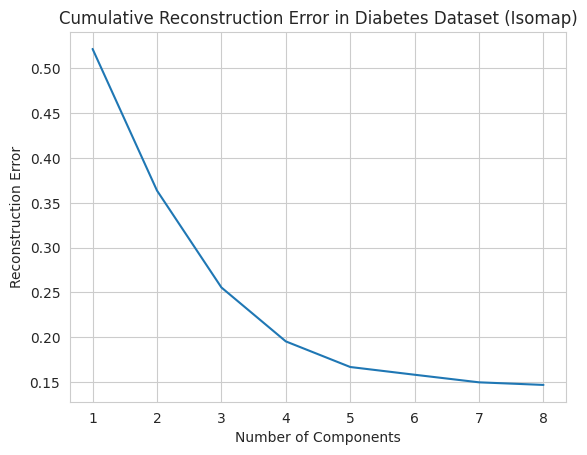

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('Diabetes_Pima.csv').dropna()

# Convert 'Diabetes' column to binary values
df['Diabetes'] = df['Diabetes'].map({'Healthy': 0, 'Sick': 1})

# Drop unnecessary columns
X_features = df.drop(columns=['Diabetes', 'Patient ID'])

# Scale data (Isomap is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Compute reconstruction error for different Isomap components
components_range = range(1, 9)
errors = []

for n in components_range:
    isomap_n = Isomap(n_components=n)
    X_transformed = isomap_n.fit_transform(X_scaled)

    # Approximate reconstruction using k-nearest neighbors
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_transformed, X_scaled)
    X_reconstructed = knn.predict(X_transformed)

    # Compute reconstruction error
    error = mean_squared_error(X_scaled, X_reconstructed)
    errors.append(error)

# Plot cumulative reconstruction error (analogous to cumulative explained variance)
plt.plot(components_range, errors, linestyle='-')
plt.title("Cumulative Reconstruction Error in Diabetes Dataset (Isomap)")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.grid(True)
plt.savefig("Isomap_CumulativeReconstructionError.png")
plt.show()

Scatterplot PCA 3D
https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [10]:

# Load the data
dia3 = pd.read_csv('Diabetes_Pima.csv')

# Drop unnecessary column
dia3.drop(['Patient ID'], axis=1, inplace=True)

# Remove rows with any missing values
dia3.dropna(axis=0, how='any', inplace=True)

# Convert 'Diabetes' to numerical
dia3['Diabetes'] = dia3['Diabetes'].map({'Healthy': 0, 'Sick': 1})

# Separate features and target
X = dia3.drop(columns=['Diabetes'])
y = dia3['Diabetes']

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

# Create DataFrame with PCA results and readable labels
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Label'] = y.map({0: 'Healthy', 1: 'Sick'})  # Convert back to strings

# Define custom color sequence: Healthy -> blue, Sick -> orange
custom_color_map = {'Healthy': 'blue', 'Sick': 'orange'}

# Plot
fig = px.scatter_3d(
    pca_df, x='PCA1', y='PCA2', z='PCA3',
    color='Label',
    color_discrete_map=custom_color_map,
    title="3D PCA Scatter Plot",
    labels={"Label": "Class"}
)
fig.update_traces(marker=dict(size=3))
fig.update_layout(
    title={
        'text': "3-Dimensional PCA",
        'x': 0.5,
        'xanchor': 'center',
        'font': dict(size=20)
    }
)
fig.show()




Create a dashboard for these algorithms via Plotly
https://dash.plotly.com/tutorial

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.3733 - loss: 0.7409 - val_accuracy: 0.4545 - val_loss: 0.7045
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5376 - loss: 0.6800 - val_accuracy: 0.7818 - val_loss: 0.6476
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7024 - loss: 0.6336 - val_accuracy: 0.8000 - val_loss: 0.6034
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7398 - loss: 0.5951 - val_accuracy: 0.8000 - val_loss: 0.5649
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7478 - loss: 0.5629 - val_accuracy: 0.8000 - val_loss: 0.5296
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7650 - loss: 0.5317 - val_accuracy: 0.8182 - val_loss: 0.4968
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7418 - loss: 0.5293 - val_accuracy: 0.8364 - val_loss: 0.4698
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7466 - loss: 0.5080 - val_accuracy: 0.8364 - val_loss: 0.4479
Epoch 9/50


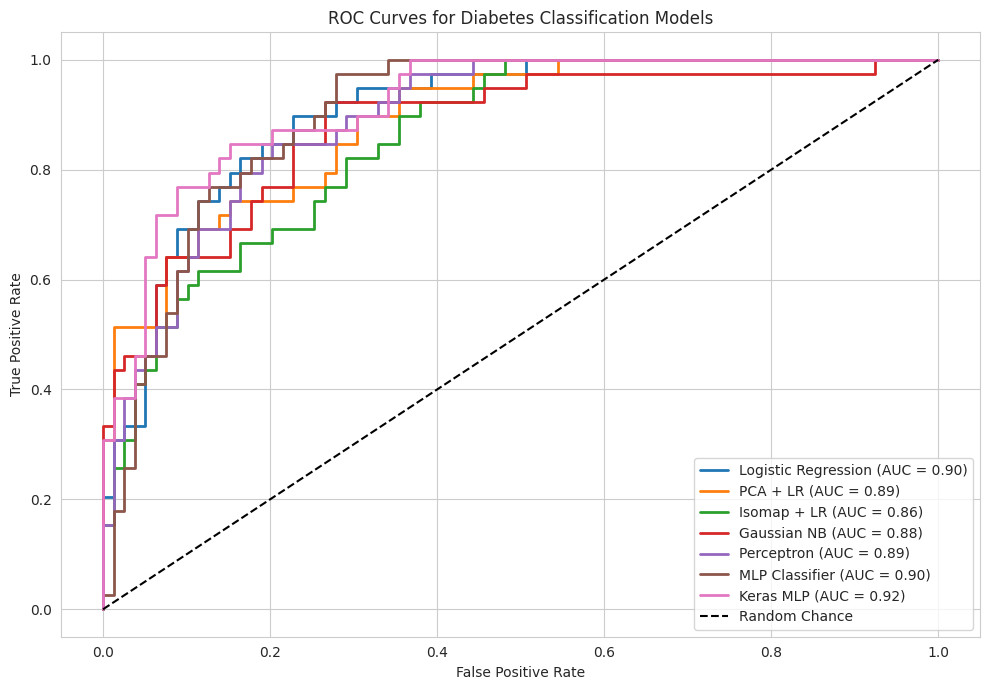

In [11]:
#ROC Mapping

# 1. Load and prepare the data
diaROC = pd.read_csv('Diabetes_Pima.csv')
diaROC.drop(['Patient ID'], axis=1, inplace=True)
diaROC.dropna(axis=0, how='any', inplace=True)
diaROC['Diabetes'] = diaROC['Diabetes'].map({'Healthy': 0, 'Sick': 1})

X = diaROC.drop(columns=['Diabetes'])
y = diaROC['Diabetes']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to collect ROC data
roc_data = {}

# 4. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_data['Logistic Regression'] = (fpr_lr, tpr_lr, auc(fpr_lr, tpr_lr))

# 5. PCA + Logistic Regression
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_proba_pca = lr_pca.predict_proba(X_test_pca)[:, 1]
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_proba_pca)
roc_data['PCA + LR'] = (fpr_pca, tpr_pca, auc(fpr_pca, tpr_pca))

# 6. Isomap + Logistic Regression
isomap = Isomap(n_components=2)
X_train_iso = isomap.fit_transform(X_train_scaled)
X_test_iso = isomap.transform(X_test_scaled)

lr_iso = LogisticRegression()
lr_iso.fit(X_train_iso, y_train)
y_proba_iso = lr_iso.predict_proba(X_test_iso)[:, 1]
fpr_iso, tpr_iso, _ = roc_curve(y_test, y_proba_iso)
roc_data['Isomap + LR'] = (fpr_iso, tpr_iso, auc(fpr_iso, tpr_iso))

# 7. Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_proba_gnb = gnb.predict_proba(X_test_scaled)[:, 1]
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_proba_gnb)
roc_data['Gaussian NB'] = (fpr_gnb, tpr_gnb, auc(fpr_gnb, tpr_gnb))

# 8. Perceptron
perceptron = Perceptron()
perceptron.fit(X_train_scaled, y_train)
y_scores_per = perceptron.decision_function(X_test_scaled)
fpr_per, tpr_per, _ = roc_curve(y_test, y_scores_per)
roc_data['Perceptron'] = (fpr_per, tpr_per, auc(fpr_per, tpr_per))

# 9-1. MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_proba_mlp = mlp.predict_proba(X_test_scaled)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
roc_data['MLP Classifier'] = (fpr_mlp, tpr_mlp, auc(fpr_mlp, tpr_mlp))

# Initialize a sequential model
mlp_keras = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
mlp_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_keras.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict probabilities for ROC analysis
y_proba_keras = mlp_keras.predict(X_test_scaled).ravel()
fpr_keras, tpr_keras, _ = roc_curve(y_test, y_proba_keras)

# Store results in the ROC data dictionary
roc_data['Keras MLP'] = (fpr_keras, tpr_keras, auc(fpr_keras, tpr_keras))

# 9. Plot all ROC curves
plt.figure(figsize=(10, 7))
for model_name, (fpr, tpr, model_auc) in roc_data.items():
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {model_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curves for Diabetes Classification Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("ROC_Curves.png")
plt.show()

K-Means Clustering Accuracy (without PCA): 0.74


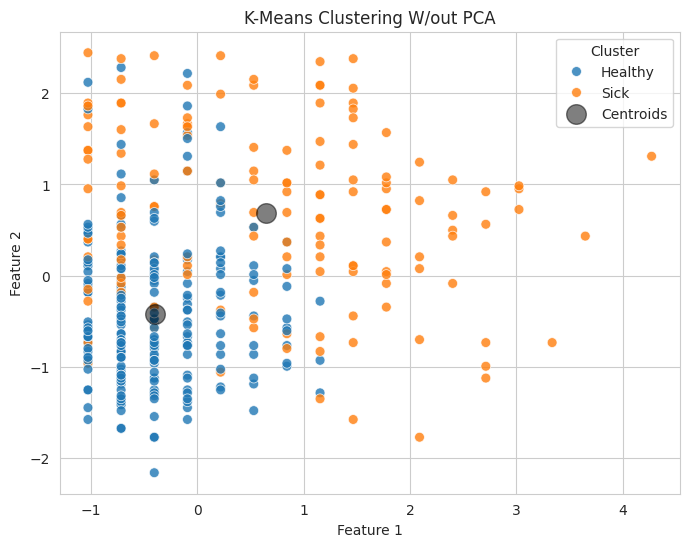

In [12]:
# Kmeans Only

# Load and prepare the data
diaKm = pd.read_csv('Diabetes_Pima.csv')
diaKm.drop(['Patient ID'], axis=1, inplace=True)
diaKm.dropna(axis=0, how='any', inplace=True)
diaKm['Diabetes'] = diaKm['Diabetes'].map({'Healthy': 0, 'Sick': 1})

# Separate features and target
X = diaKm.drop(columns=['Diabetes'])
y = diaKm['Diabetes']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=1, n_init=10)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.predict(X_scaled)

# Compare predictions with actual labels
accuracy = max(accuracy_score(y, kmeans_labels),
               accuracy_score(y, 1 - kmeans_labels))
print(f'K-Means Clustering Accuracy (without PCA): {accuracy:.2f}')

# Map cluster labels to 'Healthy' and 'Sick'
label_map = {0: 'Healthy', 1: 'Sick'}
mapped_labels = [label_map[label] for label in kmeans_labels]

# Plot the clusters using two random features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=mapped_labels, s=50, alpha=0.8)

# Label cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5, marker='o', label='Centroids')

plt.title('K-Means Clustering W/out PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title="Cluster")
plt.savefig("Kmeans_withoutPCA.png")
plt.show()


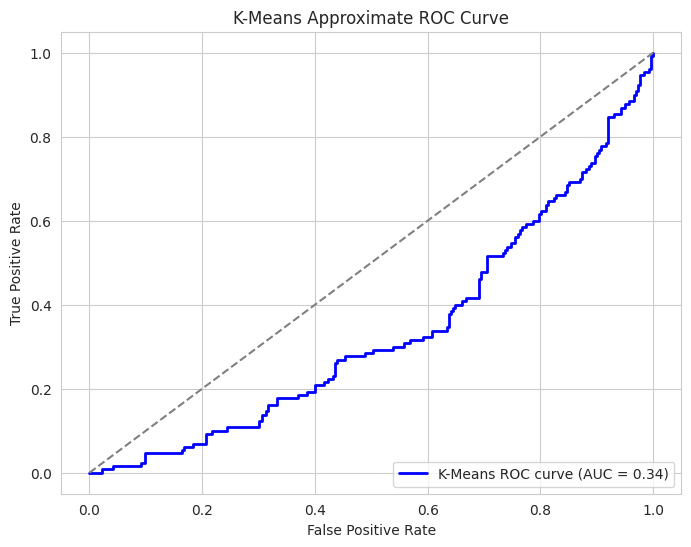

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

# Load and prepare the data
diaKm = pd.read_csv('Diabetes_Pima.csv')
diaKm.drop(['Patient ID'], axis=1, inplace=True)
diaKm.dropna(axis=0, how='any', inplace=True)
diaKm['Diabetes'] = diaKm['Diabetes'].map({'Healthy': 0, 'Sick': 1})

# Separate features and target
X = diaKm.drop(columns=['Diabetes'])
y = diaKm['Diabetes']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=1, n_init=10)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.predict(X_scaled)

# Use distance to cluster center as a proxy for probabilities
distances = kmeans.transform(X_scaled)
cluster_probs = np.min(distances, axis=1)  # Take the minimum distance for each sample

# Compute ROC curve
fpr, tpr, _ = roc_curve(y, -cluster_probs)  # Negative distances act as pseudo-scores
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'K-Means ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Means Approximate ROC Curve')
plt.legend(loc='lower right')
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6588 - loss: 0.5936  
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6650 - loss: 0.6262 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6512 - loss: 0.6144 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6948 - loss: 0.6044 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6979 - loss: 0.5878 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6669 - loss: 0.5955 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6681 - loss: 0.5967 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7175 - loss: 0.5588 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7136 - loss: 0.5871  
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7089 - loss: 0.5659  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


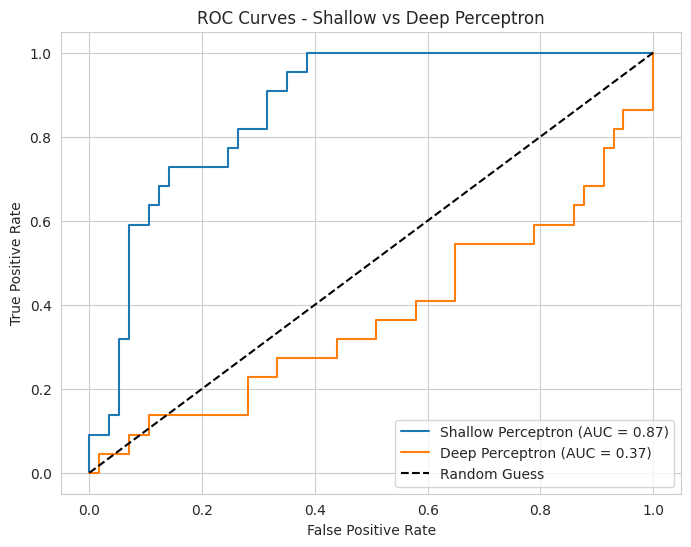

In [14]:
#Deep and Shallow
# ----- Load and Prepare the Data -----
daiDS = pd.read_csv('Diabetes_Pima.csv')
daiDS.drop(['Patient ID'], axis=1, inplace=True)
daiDS.dropna(axis=0, how='any', inplace=True)
daiDS['Diabetes'] = daiDS['Diabetes'].map({'Healthy': 0, 'Sick': 1})

# Separate features and labels
X = daiDS.drop(columns=['Diabetes'])
y = daiDS['Diabetes']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ----- Shallow Perceptron -----
shallow_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

shallow_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# ----- Deep Perceptron -----
deep_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# ----- ROC Curve Calculation -----
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plot_roc_curve(shallow_model, X_test, y_test, "Shallow Perceptron")
plot_roc_curve(deep_model, X_test, y_test, "Deep Perceptron")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Shallow vs Deep Perceptron")
plt.legend()
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4593 - loss: 1.0189 - val_accuracy: 0.3671 - val_loss: 0.9451
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4767 - loss: 0.9593 - val_accuracy: 0.3671 - val_loss: 0.9304
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4707 - loss: 0.9888 - val_accuracy: 0.3671 - val_loss: 0.9157
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4570 - loss: 0.9382 - val_accuracy: 0.3797 - val_loss: 0.9023
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4777 - loss: 0.9342 - val_accuracy: 0.3797 - val_loss: 0.8888
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4917 - loss: 0.9434 - val_accuracy: 0.3797 - val_loss: 0.8760
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5000 - loss: 0.8743 - val_accuracy: 0.3797 - val_loss: 0.8635
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4919 - loss: 0.8860 - val_accuracy: 0.3924 - val_loss: 0.

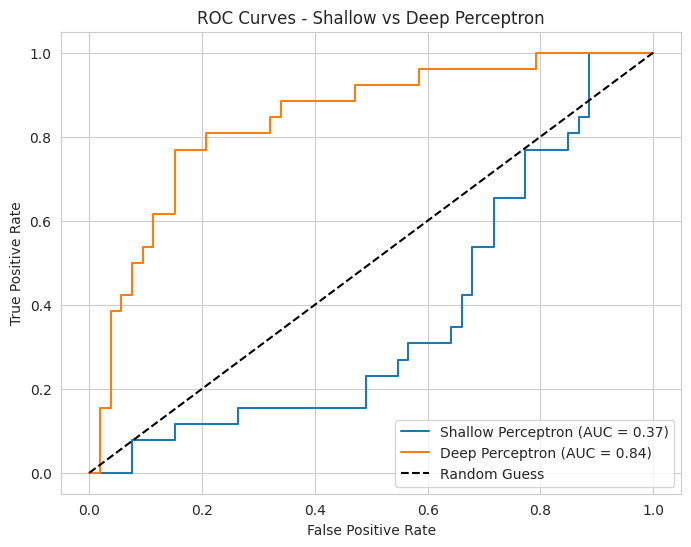

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ----- Load and Prepare the Data -----
df = pd.read_csv('Diabetes_Pima.csv')

# Drop unnecessary columns
df.drop(columns=['Patient ID'], inplace=True)

# Remove missing values
df.dropna(inplace=True)

# Convert 'Diabetes' column to binary values
df['Diabetes'] = df['Diabetes'].map({'Healthy': 0, 'Sick': 1})

# Separate features and labels
X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ----- Shallow Perceptron -----
shallow_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

shallow_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# ----- Deep Perceptron -----
deep_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deep_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# ----- Model Evaluation -----
def evaluate_model(model, X_test, y_test, model_name):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    sklearn_accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} Accuracy (TensorFlow): {accuracy:.2f}")
    print(f"{model_name} Accuracy (Sklearn): {sklearn_accuracy:.2f}")


# Evaluate Shallow Perceptron
evaluate_model(shallow_model, X_test, y_test, "Shallow Perceptron")

# Evaluate Deep Perceptron
evaluate_model(deep_model, X_test, y_test, "Deep Perceptron")

# ----- ROC Curve Calculation -----
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plot_roc_curve(shallow_model, X_test, y_test, "Shallow Perceptron")
plot_roc_curve(deep_model, X_test, y_test, "Deep Perceptron")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Shallow vs Deep Perceptron")
plt.legend()
plt.savefig("Perceptrons_ROC.png")
plt.show()
